In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
os.getcwd()

'C:\\Users\\admin\\Documents\\python-code\\Hackatho'

In [2]:
path='C:\\Users\\admin\\Documents\\python-code\\Hackatho/file/Train.csv'
data=pd.read_csv(path)
data.shape

(34226, 16)

# To see whether the id numbers or unique or not
    -we use the command data['id'].nunique(dropna=True)=> drop null values

In [3]:
data['id'].nunique(dropna=True)

34226

# select only the lat and log values of neighbourhood_group (Manhattan)

In [4]:
dpr=data[data['room_type']=='Private room']

In [5]:
dpr['room_type'].unique()

array(['Private room'], dtype=object)

In [6]:
dpr_mn=dpr[dpr['neighbourhood_group']=='Manhattan']

# The above commands can be done using the following single command

In [7]:
dpr_mn1=data[(data['room_type']=='Private room')&(data['neighbourhood_group']=='Manhattan')]

In [8]:
dpr_mn1.to_csv('Manhattan.csv')

In [9]:
dpr_mn1.head(20)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,5728806,Large private room in Nolita,4271676,Nat,Manhattan,Nolita,40.72217,-73.99481,Private room,120,7,3,2015-09-01,0.06,3,0
14,5040218,LUX Blg-Prime Area! Lg PRIVATE RM & BATH w/VIEWS!,26019828,Sonia,Manhattan,Hell's Kitchen,40.76159,-73.99824,Private room,69,2,22,2019-03-20,0.64,2,7
23,20587133,"Spacious, bright room in art-filled apartment!",116758734,Amos,Manhattan,Inwood,40.87085,-73.91830,Private room,59,4,19,2018-10-06,0.84,1,0
31,33682823,New York City Luxury Bedroom!!,224317184,Luke,Manhattan,Harlem,40.81652,-73.94914,Private room,215,5,7,2019-06-21,2.73,8,335
60,4926610,Panoramic City Views in Lux bldg,7537442,Loydeen,Manhattan,East Harlem,40.80315,-73.94017,Private room,50,7,25,2019-06-28,0.50,1,151
61,34483432,Manhattan Accommodation Across Central Park,260425153,Park Lane,Manhattan,Midtown,40.76427,-73.97618,Private room,375,1,1,2019-06-30,1.00,14,349
65,17702242,Stylish Private BR in the Upper East Side,10661558,Gio,Manhattan,Upper East Side,40.77349,-73.94994,Private room,129,1,117,2019-07-04,4.20,4,155
66,30269789,private room in apt near Fort Tryon Park.,87897420,Anne,Manhattan,Inwood,40.86171,-73.92945,Private room,65,4,1,2019-01-01,0.16,1,13
68,20147537,Paradise Room (Private Room),142812843,Eugene,Manhattan,East Harlem,40.79104,-73.93805,Private room,75,1,12,2017-11-05,0.51,2,0
71,10390256,East Village Apartment,3078092,Amanda,Manhattan,East Village,40.73144,-73.98355,Private room,75,1,0,NaN,NaN,1,0


# calculation of distance between two lat and long

In [10]:
import math

lat1=math.radians(40.72217)
lon1=math.radians(73.99481)
lat2=math.radians(40.7598)
lon2=math.radians(73.9851)

In [11]:
print(lat1)

0.7107359450568592


In [12]:
R=6373.0

dlon = lon2 - lon1
dlat = lat2 - lat1
a = math.sin(dlat / 2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon / 2)**2
c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))

distance = R * c

print('distance between lat coodinates',distance,' km')

distance between lat coodinates 4.264821681880072  km


In [13]:
dr2=dpr_mn1[['latitude','longitude']]

In [14]:
dr3=dr2.to_numpy()
dr3

array([[ 40.72217, -73.99481],
       [ 40.76159, -73.99824],
       [ 40.87085, -73.9183 ],
       ...,
       [ 40.79613, -73.96658],
       [ 40.72613, -73.98447],
       [ 40.77697, -73.97698]])

In [15]:
type(dr3)

numpy.ndarray

In [16]:
dr3[0][0]
len(dr3)

5602

In [17]:
import math
dr5=dr3*math.pi/180

dr4=dr3*math.pi/180
#dr4
dr4[:,0] -= 40.7831*math.pi/180
dlat=dr4[:,0]
dlon=dr4[:,1]

dlon -= -73.9712*math.pi/180


In [18]:
a=[]
for i in range(len(dr3)):
    a.append(math.sin(dlat[i]/2)**2+math.cos(dr5[i][0])*math.cos(40.7831*math.pi/180)*math.sin(dlon[i]/2)**2)

In [19]:
c=[]
for i in range(len(dr3)):
    c.append(math.atan2(math.sqrt(a[i]),math.sqrt(1-a[i])))
    

In [20]:
d=[]
for i in range(len(dr3)):
    d.append(6373.0*c[i])



In [21]:
dpr_mn1['Distance in km']= d

<ipython-input-21-ce9e49f88d02>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dpr_mn1['Distance in km']= d


In [22]:
dpr_mn1['price'].max()


9999

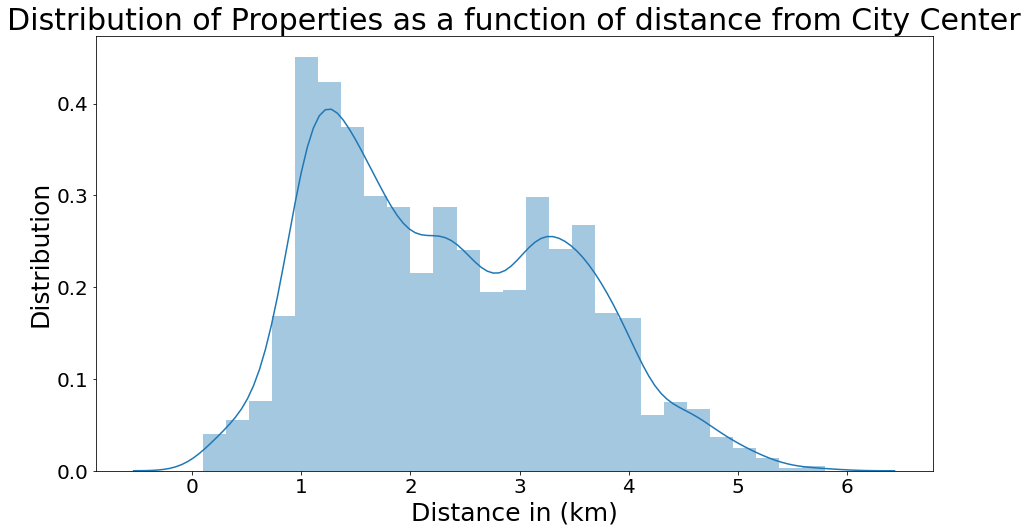

In [23]:
figure =plt.figure(figsize=(15,8))
sns.distplot(dpr_mn1['Distance in km'])
plt.title('Distribution of Properties as a function of distance from City Center', fontsize=30)
plt.xlabel('Distance in (km)',fontsize=25)
plt.ylabel('Distribution',fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

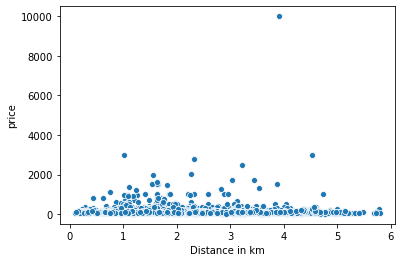

In [24]:
sns.scatterplot(dpr_mn1['Distance in km'],dpr_mn1['price'])

# Calculating the price distribution for different properties distance from city center

In [25]:
dpr_mn1.to_csv('out.csv')

In [26]:
dpr_mn2=dpr_mn1[dpr_mn1['Distance in km'] <= 3]
dpr_mn3=dpr_mn1[(dpr_mn1['Distance in km']>3) & (dpr_mn1['Distance in km']<=6)]
dpr_mn4=dpr_mn1[(dpr_mn1['Distance in km']>6) & (dpr_mn1['Distance in km']<=8)]

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:198: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:908: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


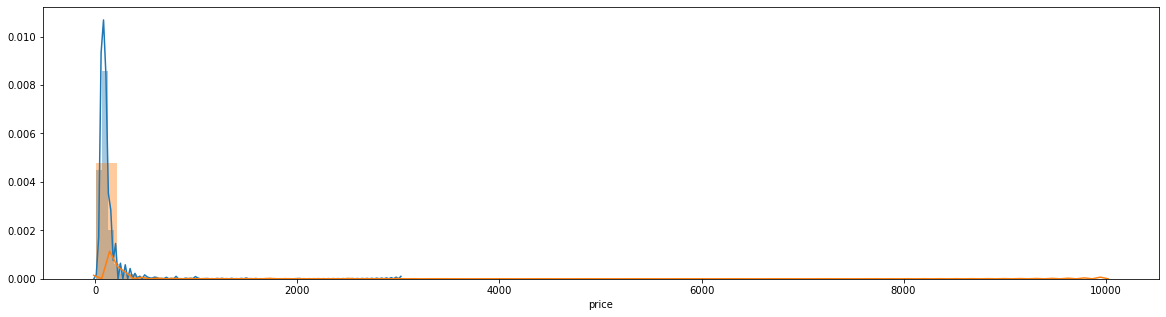

In [27]:
figure =plt.figure(figsize=(20,5))
sns.distplot(dpr_mn2['price'])
sns.distplot(dpr_mn3['price'])
sns.distplot(dpr_mn4['price'])

In [28]:
dpr_mn1n=dpr_mn1.sort_values(by='Distance in km',ascending=True)

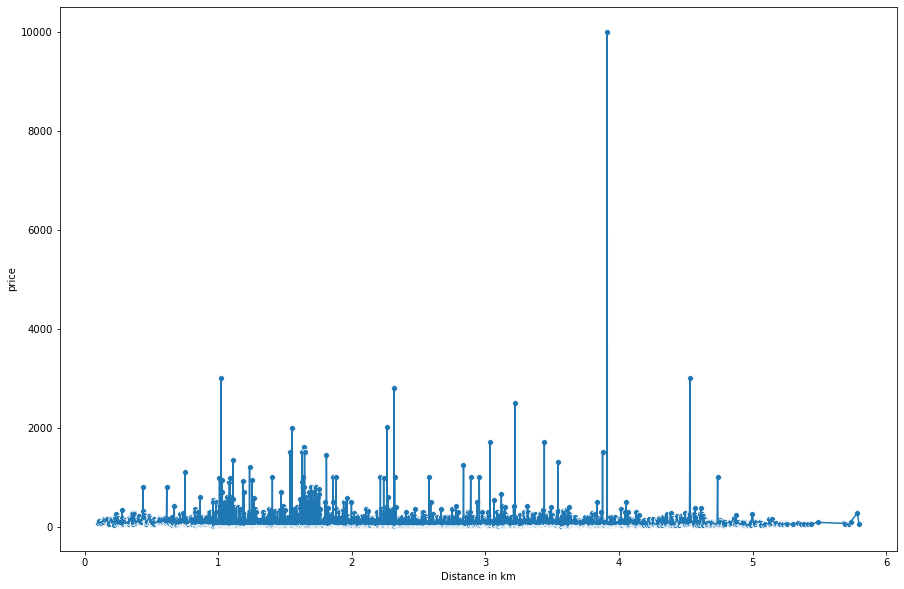

In [29]:
figure =plt.figure(figsize=(15,10))
dpr_mn1n.head()
sns.lineplot(dpr_mn1n['Distance in km'],dpr_mn1n['price'])
sns.scatterplot(dpr_mn1n['Distance in km'],dpr_mn1n['price'])

In [30]:
dpr_mn2n=dpr_mn1[dpr_mn1['price']<3500].sort_values(by='Distance in km',ascending=True)

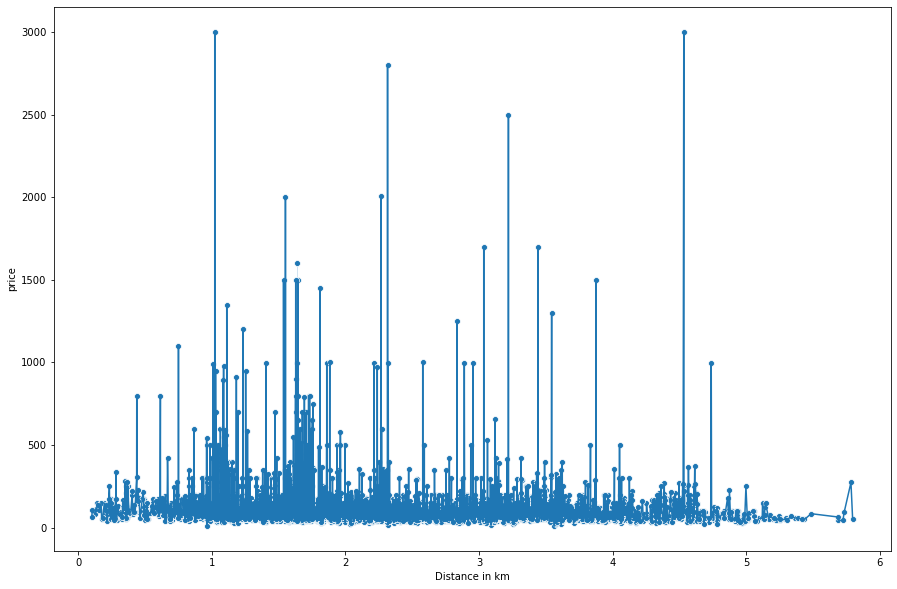

In [31]:
figure =plt.figure(figsize=(15,10))
dpr_mn1n.head()
sns.lineplot(dpr_mn2n['Distance in km'],dpr_mn1n['price'])
#sns.barplot(dpr_mn2n['Distance in km'],dpr_mn1n['price'])
sns.scatterplot(dpr_mn2n['Distance in km'],dpr_mn1n['price'])

In [32]:
dpr_mn2n.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Distance in km
19531,33456259,Beautiful upper west side apt share,8112314,Mena,Manhattan,Upper West Side,40.78399,-73.97330,Private room,65,1,4,2019-06-09,2.03,2,364,0.101342
33197,25024676,"Cozy, tranquil bedroom steps from Central Park B",152195388,Rachel,Manhattan,Upper West Side,40.78371,-73.97358,Private room,105,20,5,2019-03-25,0.39,2,64,0.105810
16037,33118582,UPPER WEST SIDE: Renovated Private Cozy Room & BR,15807180,Michael,Manhattan,Upper West Side,40.78536,-73.97116,Private room,82,2,26,2019-06-30,7.29,3,288,0.125701
4000,1763736,Charming Upper West Side 1 Bedroom,1304097,Edon,Manhattan,Upper West Side,40.78448,-73.97386,Private room,116,1,43,2018-08-01,0.63,1,0,0.135785
1267,21106395,"Cozy, tranquil bedroom steps from Central Park A",152195388,Rachel,Manhattan,Upper West Side,40.78489,-73.97345,Private room,99,20,7,2019-03-31,0.42,2,125,0.137432
